# Testing the network class 

In this notebook, we check that the `BaseNetwork` class from `architectures.py` is working expectedly.

First we load the librairies

In [1]:
import sys, os 
sys.path.append(os.getcwd()+'/../src')
sys.path.append(os.getcwd()+'/../data')

import numpy
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import clear_output

import architectures
import mnist
import utils
import callbacks

Then we load the data

In [2]:
X_train, y_train_lab = mnist.load_mnist(dataset='training', path=os.getcwd()+'/../data/mnist')
X_train = numpy.reshape(X_train, [X_train.shape[0], -1])
X_train = X_train/255.
y_train = utils.labels_to_categoricals(y_train_lab)

X_test, y_test_lab = mnist.load_mnist(dataset='testing', path=os.getcwd()+'/../data/mnist')
X_test = numpy.reshape(X_test, [X_test.shape[0], -1])
X_test = X_test/255.
y_test = utils.labels_to_categoricals(y_test_lab)

We instantiate the Mnist network

In [3]:
network = architectures.MnistNetwork(os.getcwd()+"/Logs")

We define the training callback:

In [4]:
def callback(network):
    callbacks.ipython_clear_callback()
    callbacks.plot_callback(network)
    callbacks.print_callback(network)

We clear the Logs dir

In [5]:
import shutil
shutil.rmtree(os.getcwd()+"/Logs")
os.makedirs(os.getcwd()+"/Logs")

We train the network on training set until 0.98 accuracy on training set is reached

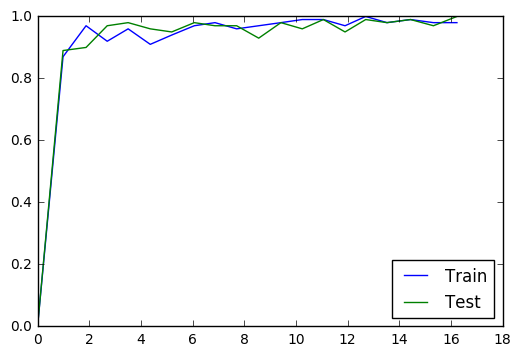

Number of iterations: 2000
Elapsed Time: 00:00:16
Last iteration duration: 0.91 seconds
Last train accuracy: 0.980000
Last test accuracy: 1.000000


In [6]:
network.train(X_train, y_train, X_test, y_test, iterations=2000, callback=callback)

We plot `history` data

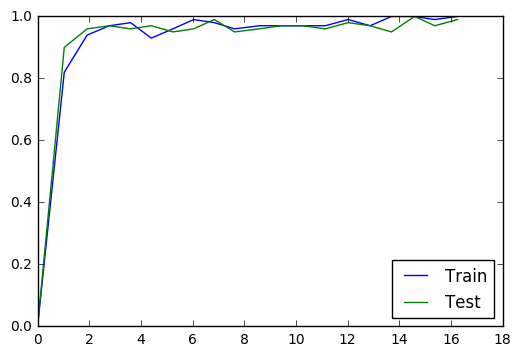

In [7]:
callbacks.plot_callback(network)

We plot summaries values

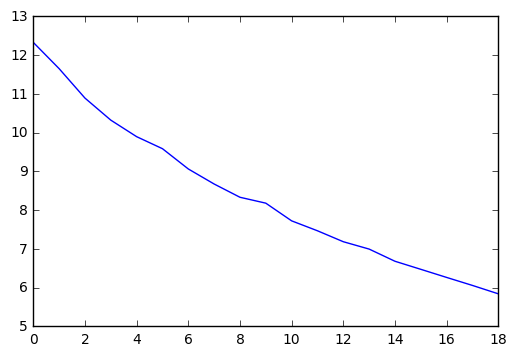

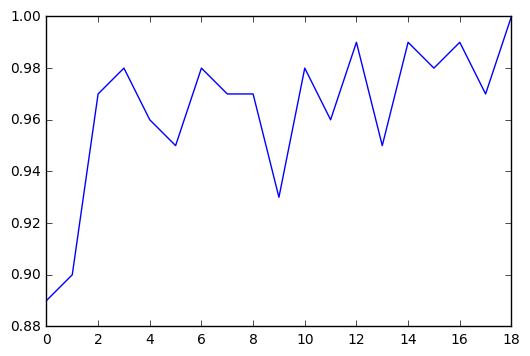

In [9]:
plt.plot(network.get_summaries(name='Loss/Loss'))
plt.show()
plt.plot(network.get_summaries(name='Accuracy/Accuracy'))
plt.show()

We evaluate few test samples

In [8]:
network.evaluate(X_test[1:10])

array([[  6.81110748e-07,   8.96930760e-06,   9.99981165e-01,
          2.20546508e-06,   3.34442977e-12,   4.43601138e-08,
          5.87945669e-06,   3.20358157e-10,   1.11941938e-06,
          5.85048806e-12],
       [  1.03854043e-04,   9.93468165e-01,   6.21607236e-04,
          4.24519203e-05,   2.42255465e-03,   1.78890434e-04,
          1.38094692e-04,   2.66477838e-03,   1.39874493e-04,
          2.19649868e-04],
       [  9.99849916e-01,   2.22386916e-07,   6.74420880e-06,
          1.03447098e-06,   1.02765375e-06,   2.32235811e-06,
          1.21669691e-04,   1.87554281e-06,   9.91817615e-08,
          1.51503791e-05],
       [  6.94471396e-08,   7.42785687e-07,   6.79980360e-07,
          1.44969178e-07,   9.99512315e-01,   4.44891953e-07,
          5.35676463e-06,   4.29651800e-06,   2.81129815e-07,
          4.75615670e-04],
       [  2.09579812e-05,   9.97868180e-01,   8.16807005e-05,
          7.20535809e-06,   1.02629117e-03,   4.86490217e-06,
          1.13838178e-05

We test accuracy over test set

In [11]:
network.test(X_test, y_test)

0.98170000000000002

We save the network

In [12]:
network.save('mnist')

We create a new network object

In [13]:
network_new = architectures.MnistNetwork()

We test the performance of this fresh network over test set

In [14]:
network_new.test(X_test, y_test)

0.098400000000000001

We restore the learned weights

In [16]:
network_new.load('mnist')

We test again the performance of this restored network

In [17]:
network_new.test(X_test, y_test)

0.98170000000000002

We save the weights as ```.mat``` files

In [5]:
network.save_mat_weights()